In [1]:
import pandas as pd
import datetime
import json

In [3]:
with open('transaction-data-adhoc-analysis.json','r') as f:
    data=json.load(f)

In [4]:
transactionsdf=pd.DataFrame(data)

In [5]:
transactionsdf

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [6]:
count_item_per_month_df=transactionsdf[["transaction_items","transaction_date"]]

In [7]:
count_item_per_month_df['month'] = pd.DatetimeIndex(count_item_per_month_df['transaction_date']).month

/var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/ipykernel_1445/33389335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_item_per_month_df['month'] = pd.DatetimeIndex(count_item_per_month_df['transaction_date']).month


In [8]:
items=count_item_per_month_df.transaction_items.str.split(';', expand=True)

In [9]:
items

,0,1,2
0,"Exotic Extras,Beef Chicharon,(x4)",None,None
1,"Exotic Extras,Beef Chicharon,(x3)","HealthyKid 3+,Nutrional Milk,(x4)","Candy City,Orange Beans,(x1)"
2,"HealthyKid 3+,Gummy Vitamins,(x3)","HealthyKid 3+,Yummy Vegetables,(x2)",None
3,"HealthyKid 3+,Yummy Vegetables,(x1)",None,None
4,"Candy City,Orange Beans,(x3)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Gummy Vitamins,(x1)"
...,...,...,...
83031,"Exotic Extras,Kimchi and Seaweed,(x2)","HealthyKid 3+,Nutrional Milk,(x1)",None
83032,"HealthyKid 3+,Yummy Vegetables,(x1)","Exotic Extras,Kimchi and Seaweed,(x1)","Candy City,Orange Beans,(x4)"
83033,"Candy City,Orange Beans,(x4)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Yummy Vegetables,(x4)"
83034,"HealthyKid 3+,Nutrional Milk,(x2)","Candy City,Gummy Worms,(x2)",None


In [10]:
def reformat(x): #add in python files submission
    if x==None:
        return str("None,0")
    x_1=x.split(",")
    x_final=x_1[0] + ":" + x_1[1] +","+ x_1[2]
    return x_final

In [11]:
items["new0"]=items[0].apply(reformat)

In [12]:
items["new1"]=items[1].apply(reformat)

In [13]:
items["new2"]=items[2].apply(reformat)

In [14]:
items

,0,1,2,new0,new1,new2
0,"Exotic Extras,Beef Chicharon,(x4)",None,None,"Exotic Extras:Beef Chicharon,(x4)","None,0","None,0"
1,"Exotic Extras,Beef Chicharon,(x3)","HealthyKid 3+,Nutrional Milk,(x4)","Candy City,Orange Beans,(x1)","Exotic Extras:Beef Chicharon,(x3)","HealthyKid 3+:Nutrional Milk,(x4)","Candy City:Orange Beans,(x1)"
2,"HealthyKid 3+,Gummy Vitamins,(x3)","HealthyKid 3+,Yummy Vegetables,(x2)",None,"HealthyKid 3+:Gummy Vitamins,(x3)","HealthyKid 3+:Yummy Vegetables,(x2)","None,0"
3,"HealthyKid 3+,Yummy Vegetables,(x1)",None,None,"HealthyKid 3+:Yummy Vegetables,(x1)","None,0","None,0"
4,"Candy City,Orange Beans,(x3)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Gummy Vitamins,(x1)","Candy City:Orange Beans,(x3)","Candy City:Gummy Worms,(x4)","HealthyKid 3+:Gummy Vitamins,(x1)"
...,...,...,...,...,...,...
83031,"Exotic Extras,Kimchi and Seaweed,(x2)","HealthyKid 3+,Nutrional Milk,(x1)",None,"Exotic Extras:Kimchi and Seaweed,(x2)","HealthyKid 3+:Nutrional Milk,(x1)","None,0"
83032,"HealthyKid 3+,Yummy Vegetables,(x1)","Exotic Extras,Kimchi and Seaweed,(x1)","Candy City,Orange Beans,(x4)","HealthyKid 3+:Yummy Vegetables,(x1)","Exotic Extras:Kimchi and Seaweed,(x1)","Candy City:Orange Beans,(x4)"
83033,"Candy City,Orange Beans,(x4)","Candy City,Gummy Worms,(x4)","HealthyKid 3+,Yummy Vegetables,(x4)","Candy City:Orange Beans,(x4)","Candy City:Gummy Worms,(x4)","HealthyKid 3+:Yummy Vegetables,(x4)"
83034,"HealthyKid 3+,Nutrional Milk,(x2)","Candy City,Gummy Worms,(x2)",None,"HealthyKid 3+:Nutrional Milk,(x2)","Candy City:Gummy Worms,(x2)","None,0"


In [15]:
items.drop(0,inplace=True, axis=1)

In [16]:
items.drop(1,inplace=True, axis=1)

In [17]:
items.drop(2,inplace=True, axis=1)

In [18]:
items

,new0,new1,new2
0,"Exotic Extras:Beef Chicharon,(x4)","None,0","None,0"
1,"Exotic Extras:Beef Chicharon,(x3)","HealthyKid 3+:Nutrional Milk,(x4)","Candy City:Orange Beans,(x1)"
2,"HealthyKid 3+:Gummy Vitamins,(x3)","HealthyKid 3+:Yummy Vegetables,(x2)","None,0"
3,"HealthyKid 3+:Yummy Vegetables,(x1)","None,0","None,0"
4,"Candy City:Orange Beans,(x3)","Candy City:Gummy Worms,(x4)","HealthyKid 3+:Gummy Vitamins,(x1)"
...,...,...,...
83031,"Exotic Extras:Kimchi and Seaweed,(x2)","HealthyKid 3+:Nutrional Milk,(x1)","None,0"
83032,"HealthyKid 3+:Yummy Vegetables,(x1)","Exotic Extras:Kimchi and Seaweed,(x1)","Candy City:Orange Beans,(x4)"
83033,"Candy City:Orange Beans,(x4)","Candy City:Gummy Worms,(x4)","HealthyKid 3+:Yummy Vegetables,(x4)"
83034,"HealthyKid 3+:Nutrional Milk,(x2)","Candy City:Gummy Worms,(x2)","None,0"


In [19]:
items[["revise0","Quantity1"]]=items.new0.str.split(',', expand=True)

In [20]:
items[["revise1","Quantity2"]]=items.new1.str.split(',', expand=True)

In [21]:
items[["revise2","Quantity3"]]=items.new2.str.split(',', expand=True)

In [22]:
items

,new0,new1,new2,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3
0,"Exotic Extras:Beef Chicharon,(x4)","None,0","None,0",Exotic Extras:Beef Chicharon,(x4),None,0,None,0
1,"Exotic Extras:Beef Chicharon,(x3)","HealthyKid 3+:Nutrional Milk,(x4)","Candy City:Orange Beans,(x1)",Exotic Extras:Beef Chicharon,(x3),HealthyKid 3+:Nutrional Milk,(x4),Candy City:Orange Beans,(x1)
2,"HealthyKid 3+:Gummy Vitamins,(x3)","HealthyKid 3+:Yummy Vegetables,(x2)","None,0",HealthyKid 3+:Gummy Vitamins,(x3),HealthyKid 3+:Yummy Vegetables,(x2),None,0
3,"HealthyKid 3+:Yummy Vegetables,(x1)","None,0","None,0",HealthyKid 3+:Yummy Vegetables,(x1),None,0,None,0
4,"Candy City:Orange Beans,(x3)","Candy City:Gummy Worms,(x4)","HealthyKid 3+:Gummy Vitamins,(x1)",Candy City:Orange Beans,(x3),Candy City:Gummy Worms,(x4),HealthyKid 3+:Gummy Vitamins,(x1)
...,...,...,...,...,...,...,...,...,...
83031,"Exotic Extras:Kimchi and Seaweed,(x2)","HealthyKid 3+:Nutrional Milk,(x1)","None,0",Exotic Extras:Kimchi and Seaweed,(x2),HealthyKid 3+:Nutrional Milk,(x1),None,0
83032,"HealthyKid 3+:Yummy Vegetables,(x1)","Exotic Extras:Kimchi and Seaweed,(x1)","Candy City:Orange Beans,(x4)",HealthyKid 3+:Yummy Vegetables,(x1),Exotic Extras:Kimchi and Seaweed,(x1),Candy City:Orange Beans,(x4)
83033,"Candy City:Orange Beans,(x4)","Candy City:Gummy Worms,(x4)","HealthyKid 3+:Yummy Vegetables,(x4)",Candy City:Orange Beans,(x4),Candy City:Gummy Worms,(x4),HealthyKid 3+:Yummy Vegetables,(x4)
83034,"HealthyKid 3+:Nutrional Milk,(x2)","Candy City:Gummy Worms,(x2)","None,0",HealthyKid 3+:Nutrional Milk,(x2),Candy City:Gummy Worms,(x2),None,0


In [23]:
items.drop("new0",inplace=True, axis=1)

In [24]:
items.drop("new1",inplace=True, axis=1)

In [25]:
items.drop("new2",inplace=True, axis=1)

In [26]:
items

,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3
0,Exotic Extras:Beef Chicharon,(x4),None,0,None,0
1,Exotic Extras:Beef Chicharon,(x3),HealthyKid 3+:Nutrional Milk,(x4),Candy City:Orange Beans,(x1)
2,HealthyKid 3+:Gummy Vitamins,(x3),HealthyKid 3+:Yummy Vegetables,(x2),None,0
3,HealthyKid 3+:Yummy Vegetables,(x1),None,0,None,0
4,Candy City:Orange Beans,(x3),Candy City:Gummy Worms,(x4),HealthyKid 3+:Gummy Vitamins,(x1)
...,...,...,...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,(x2),HealthyKid 3+:Nutrional Milk,(x1),None,0
83032,HealthyKid 3+:Yummy Vegetables,(x1),Exotic Extras:Kimchi and Seaweed,(x1),Candy City:Orange Beans,(x4)
83033,Candy City:Orange Beans,(x4),Candy City:Gummy Worms,(x4),HealthyKid 3+:Yummy Vegetables,(x4)
83034,HealthyKid 3+:Nutrional Milk,(x2),Candy City:Gummy Worms,(x2),None,0


In [27]:
def replace_2(y):#add in python files submission
    
    if y=="0":
        return str("0")
    
    else:
        new_y=y.replace("(","")
        new_y2=new_y.replace(")","")
        new_y3=new_y2.replace("x","")
    return new_y3

In [28]:
def replace_new(y):#add in python files submission
        new_y=y.replace("(","")
        new_y2=new_y.replace(")","")
        new_y3=new_y2.replace("x","")
        return new_y3

In [29]:
items["Quantity1"]=items["Quantity1"].apply(replace_new)

In [30]:
items["Quantity2"]=items["Quantity2"].apply(replace_2)

In [31]:
items["Quantity3"]=items["Quantity3"].apply(replace_2)

In [32]:
items

,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3
0,Exotic Extras:Beef Chicharon,4,None,0,None,0
1,Exotic Extras:Beef Chicharon,3,HealthyKid 3+:Nutrional Milk,4,Candy City:Orange Beans,1
2,HealthyKid 3+:Gummy Vitamins,3,HealthyKid 3+:Yummy Vegetables,2,None,0
3,HealthyKid 3+:Yummy Vegetables,1,None,0,None,0
4,Candy City:Orange Beans,3,Candy City:Gummy Worms,4,HealthyKid 3+:Gummy Vitamins,1
...,...,...,...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,2,HealthyKid 3+:Nutrional Milk,1,None,0
83032,HealthyKid 3+:Yummy Vegetables,1,Exotic Extras:Kimchi and Seaweed,1,Candy City:Orange Beans,4
83033,Candy City:Orange Beans,4,Candy City:Gummy Worms,4,HealthyKid 3+:Yummy Vegetables,4
83034,HealthyKid 3+:Nutrional Milk,2,Candy City:Gummy Worms,2,None,0


In [33]:
def convert(x):#add in python files submission
    int1=int(x)
    return int1

In [34]:
items["Quantity1"]=items["Quantity1"].apply(convert)

In [35]:
items["Quantity2"]=items["Quantity2"].apply(convert)

In [36]:
items["Quantity3"]=items["Quantity3"].apply(convert)

In [37]:
items

,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3
0,Exotic Extras:Beef Chicharon,4,None,0,None,0
1,Exotic Extras:Beef Chicharon,3,HealthyKid 3+:Nutrional Milk,4,Candy City:Orange Beans,1
2,HealthyKid 3+:Gummy Vitamins,3,HealthyKid 3+:Yummy Vegetables,2,None,0
3,HealthyKid 3+:Yummy Vegetables,1,None,0,None,0
4,Candy City:Orange Beans,3,Candy City:Gummy Worms,4,HealthyKid 3+:Gummy Vitamins,1
...,...,...,...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,2,HealthyKid 3+:Nutrional Milk,1,None,0
83032,HealthyKid 3+:Yummy Vegetables,1,Exotic Extras:Kimchi and Seaweed,1,Candy City:Orange Beans,4
83033,Candy City:Orange Beans,4,Candy City:Gummy Worms,4,HealthyKid 3+:Yummy Vegetables,4
83034,HealthyKid 3+:Nutrional Milk,2,Candy City:Gummy Worms,2,None,0


In [38]:
items["month"]=count_item_per_month_df["month"]

In [39]:
items

,revise0,Quantity1,revise1,Quantity2,revise2,Quantity3,month
0,Exotic Extras:Beef Chicharon,4,None,0,None,0,1
1,Exotic Extras:Beef Chicharon,3,HealthyKid 3+:Nutrional Milk,4,Candy City:Orange Beans,1,1
2,HealthyKid 3+:Gummy Vitamins,3,HealthyKid 3+:Yummy Vegetables,2,None,0,1
3,HealthyKid 3+:Yummy Vegetables,1,None,0,None,0,1
4,Candy City:Orange Beans,3,Candy City:Gummy Worms,4,HealthyKid 3+:Gummy Vitamins,1,1
...,...,...,...,...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,2,HealthyKid 3+:Nutrional Milk,1,None,0,6
83032,HealthyKid 3+:Yummy Vegetables,1,Exotic Extras:Kimchi and Seaweed,1,Candy City:Orange Beans,4,6
83033,Candy City:Orange Beans,4,Candy City:Gummy Worms,4,HealthyKid 3+:Yummy Vegetables,4,6
83034,HealthyKid 3+:Nutrional Milk,2,Candy City:Gummy Worms,2,None,0,6


In [40]:
trial_1=items[["revise0","Quantity1","month"]]

In [41]:
trial_2=items[["revise1","Quantity2","month"]]

In [42]:
trial_3=items[["revise2","Quantity3","month"]]

In [43]:
trial_1.rename(columns = {"revise0":"Items", "Quantity1":"Count"}, inplace = True)

/Users/salvadorfamily/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [44]:
trial_2.rename(columns = {"revise1":"Items", "Quantity2":"Count"}, inplace = True)

In [45]:
trial_3.rename(columns = {"revise2":"Items", "Quantity3":"Count"}, inplace = True)

In [46]:
trial_1

,Items,Count,month
0,Exotic Extras:Beef Chicharon,4,1
1,Exotic Extras:Beef Chicharon,3,1
2,HealthyKid 3+:Gummy Vitamins,3,1
3,HealthyKid 3+:Yummy Vegetables,1,1
4,Candy City:Orange Beans,3,1
...,...,...,...
83031,Exotic Extras:Kimchi and Seaweed,2,6
83032,HealthyKid 3+:Yummy Vegetables,1,6
83033,Candy City:Orange Beans,4,6
83034,HealthyKid 3+:Nutrional Milk,2,6


In [47]:
trial_2

,Items,Count,month
0,None,0,1
1,HealthyKid 3+:Nutrional Milk,4,1
2,HealthyKid 3+:Yummy Vegetables,2,1
3,None,0,1
4,Candy City:Gummy Worms,4,1
...,...,...,...
83031,HealthyKid 3+:Nutrional Milk,1,6
83032,Exotic Extras:Kimchi and Seaweed,1,6
83033,Candy City:Gummy Worms,4,6
83034,Candy City:Gummy Worms,2,6


In [48]:
trial_3

,Items,Count,month
0,None,0,1
1,Candy City:Orange Beans,1,1
2,None,0,1
3,None,0,1
4,HealthyKid 3+:Gummy Vitamins,1,1
...,...,...,...
83031,None,0,6
83032,Candy City:Orange Beans,4,6
83033,HealthyKid 3+:Yummy Vegetables,4,6
83034,None,0,6


In [49]:
trial_table_1=pd.pivot_table(trial_1, values=["Count"], index=["Items"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [50]:
trial_table_2=pd.pivot_table(trial_2, values=["Count"], index=["Items"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [51]:
trial_table_3=pd.pivot_table(trial_3, values=["Count"], index=["Items"], columns="month", aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)


In [52]:
trial_table_1

Count                              
month                                1     2     3     4     5     6
Items                                                               
Candy City:Gummy Worms            4844  4818  5178  4881  4946  5024
Candy City:Orange Beans           4947  5162  4783  4982  4999  5024
Exotic Extras:Beef Chicharon      4957  5099  4813  4898  4945  4844
Exotic Extras:Kimchi and Seaweed  4857  4881  5047  4872  4859  5047
HealthyKid 3+:Gummy Vitamins      4853  5078  5087  4859  4978  4899
HealthyKid 3+:Nutrional Milk      4855  4844  4757  4785  4856  4783
HealthyKid 3+:Yummy Vegetables    5080  4930  4888  5041  4965  4971

In [53]:
trial_table_2

Count                              
month                                1     2     3     4     5     6
Items                                                               
Candy City:Gummy Worms            3201  3361  3174  3327  3228  3281
Candy City:Orange Beans           3343  3285  3232  3357  3351  3303
Exotic Extras:Beef Chicharon      3143  3323  3387  3287  3382  3353
Exotic Extras:Kimchi and Seaweed  3197  3342  3294  3446  3222  3398
HealthyKid 3+:Gummy Vitamins      3116  3296  3337  3280  3204  3317
HealthyKid 3+:Nutrional Milk      3301  3203  3466  3290  3383  3335
HealthyKid 3+:Yummy Vegetables    3278  3662  3299  3227  3154  3220
None                                 0     0     0     0     0     0

In [54]:
trial_table_3

Count                              
month                                1     2     3     4     5     6
Items                                                               
Candy City:Gummy Worms            1514  1817  1634  1835  1627  1629
Candy City:Orange Beans           1484  1590  1596  1575  1614  1779
Exotic Extras:Beef Chicharon      1565  1579  1616  1705  1701  1705
Exotic Extras:Kimchi and Seaweed  1622  1726  1626  1603  1692  1659
HealthyKid 3+:Gummy Vitamins      1712  1606  1721  1703  1766  1764
HealthyKid 3+:Nutrional Milk      1571  1644  1653  1711  1642  1649
HealthyKid 3+:Yummy Vegetables    1601  1664  1709  1593  1616  1531
None                                 0     0     0     0     0     0

In [55]:
final_count_per_item=trial_table_1+trial_table_2+trial_table_3

In [56]:
final_count_per_item

Count                                      \
month                                  1        2        3        4        5   
Items                                                                          
Candy City:Gummy Worms            9559.0   9996.0   9986.0  10043.0   9801.0   
Candy City:Orange Beans           9774.0  10037.0   9611.0   9914.0   9964.0   
Exotic Extras:Beef Chicharon      9665.0  10001.0   9816.0   9890.0  10028.0   
Exotic Extras:Kimchi and Seaweed  9676.0   9949.0   9967.0   9921.0   9773.0   
HealthyKid 3+:Gummy Vitamins      9681.0   9980.0  10145.0   9842.0   9948.0   
HealthyKid 3+:Nutrional Milk      9727.0   9691.0   9876.0   9786.0   9881.0   
HealthyKid 3+:Yummy Vegetables    9959.0  10256.0   9896.0   9861.0   9735.0   
None                                 NaN      NaN      NaN      NaN      NaN   

                                           
month                                   6  
Items                                      
Candy City:Gummy Worms             9934.0  
Candy City:Orange Beans           10106.0  
Exotic Extras:Beef Chicharon       9902.0  
Exotic Extras:Kimchi and Seaweed  10104.0  
HealthyKid 3+:Gummy Vitamins       9980.0  
HealthyKid 3+:Nutrional Milk       9767.0  
HealthyKid 3+:Yummy Vegetables     9722.0  
None                                  NaN

In [57]:
final_count_per_item.drop("None",axis=0,inplace=True)

In [58]:
final_count_per_item

Count                                      \
month                                  1        2        3        4        5   
Items                                                                          
Candy City:Gummy Worms            9559.0   9996.0   9986.0  10043.0   9801.0   
Candy City:Orange Beans           9774.0  10037.0   9611.0   9914.0   9964.0   
Exotic Extras:Beef Chicharon      9665.0  10001.0   9816.0   9890.0  10028.0   
Exotic Extras:Kimchi and Seaweed  9676.0   9949.0   9967.0   9921.0   9773.0   
HealthyKid 3+:Gummy Vitamins      9681.0   9980.0  10145.0   9842.0   9948.0   
HealthyKid 3+:Nutrional Milk      9727.0   9691.0   9876.0   9786.0   9881.0   
HealthyKid 3+:Yummy Vegetables    9959.0  10256.0   9896.0   9861.0   9735.0   

                                           
month                                   6  
Items                                      
Candy City:Gummy Worms             9934.0  
Candy City:Orange Beans           10106.0  
Exotic Extras:Beef Chicharon       9902.0  
Exotic Extras:Kimchi and Seaweed  10104.0  
HealthyKid 3+:Gummy Vitamins       9980.0  
HealthyKid 3+:Nutrional Milk       9767.0  
HealthyKid 3+:Yummy Vegetables     9722.0

In [59]:
final_count_per_item_bar=final_count_per_item.reset_index()

In [60]:
final_count_per_item_bar

Items   Count                             \
month                                         1        2        3        4   
0                Candy City:Gummy Worms  9559.0   9996.0   9986.0  10043.0   
1               Candy City:Orange Beans  9774.0  10037.0   9611.0   9914.0   
2          Exotic Extras:Beef Chicharon  9665.0  10001.0   9816.0   9890.0   
3      Exotic Extras:Kimchi and Seaweed  9676.0   9949.0   9967.0   9921.0   
4          HealthyKid 3+:Gummy Vitamins  9681.0   9980.0  10145.0   9842.0   
5          HealthyKid 3+:Nutrional Milk  9727.0   9691.0   9876.0   9786.0   
6        HealthyKid 3+:Yummy Vegetables  9959.0  10256.0   9896.0   9861.0   

                         
month        5        6  
0       9801.0   9934.0  
1       9964.0  10106.0  
2      10028.0   9902.0  
3       9773.0  10104.0  
4       9948.0   9980.0  
5       9881.0   9767.0  
6       9735.0   9722.0

In [61]:
final_bar_2=final_count_per_item_bar["Count"]

In [62]:
final_bar_2

month,1,2,3,4,5,6
0,9559.0,9996.0,9986.0,10043.0,9801.0,9934.0
1,9774.0,10037.0,9611.0,9914.0,9964.0,10106.0
2,9665.0,10001.0,9816.0,9890.0,10028.0,9902.0
3,9676.0,9949.0,9967.0,9921.0,9773.0,10104.0
4,9681.0,9980.0,10145.0,9842.0,9948.0,9980.0
5,9727.0,9691.0,9876.0,9786.0,9881.0,9767.0
6,9959.0,10256.0,9896.0,9861.0,9735.0,9722.0


In [63]:
final_final_bar=final_bar_2.transpose()

In [64]:
final_final_bar

,0,1,2,3,4,5,6
month,,,,,,,
1,9559.0,9774.0,9665.0,9676.0,9681.0,9727.0,9959.0
2,9996.0,10037.0,10001.0,9949.0,9980.0,9691.0,10256.0
3,9986.0,9611.0,9816.0,9967.0,10145.0,9876.0,9896.0
4,10043.0,9914.0,9890.0,9921.0,9842.0,9786.0,9861.0
5,9801.0,9964.0,10028.0,9773.0,9948.0,9881.0,9735.0
6,9934.0,10106.0,9902.0,10104.0,9980.0,9767.0,9722.0


In [66]:
list_1=final_final_bar.index

In [67]:
list_1

Index([1, 2, 3, 4, 5, 6], dtype='object', name='month')

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

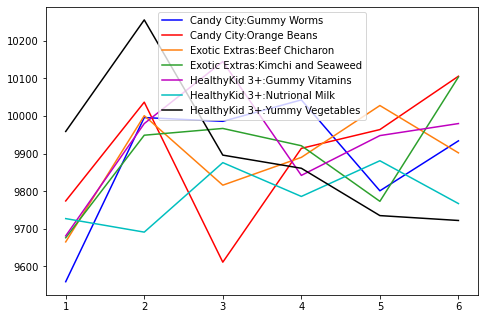

In [169]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1,])
ax.plot(list_1,final_final_bar[0],color='b',label="Candy City:Gummy Worms")
ax.plot(list_1,final_final_bar[1],color='r',label="Candy City:Orange Beans")
ax.plot(list_1,final_final_bar[2],color='tab:orange',label="Exotic Extras:Beef Chicharon")
ax.plot(list_1,final_final_bar[3],color='tab:green',label="Exotic Extras:Kimchi and Seaweed")
ax.plot(list_1,final_final_bar[4],color='m',label="HealthyKid 3+:Gummy Vitamins")
ax.plot(list_1,final_final_bar[5],color='c',label="HealthyKid 3+:Nutrional Milk")
ax.plot(list_1,final_final_bar[6],color='k',label="HealthyKid 3+:Yummy Vegetables")
ax.legend()
plt.savefig('Summary of Trends per Item.png', dpi=600, bbox_inches='tight')

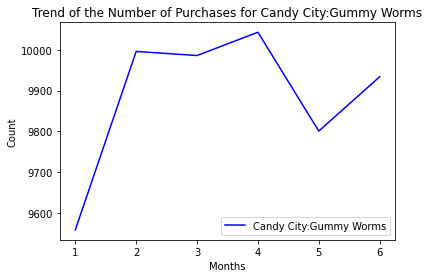

In [170]:
line1,= plt.plot(list_1,final_final_bar[0],color='b',label="Candy City:Gummy Worms")
plt.xlabel('Months')
plt.ylabel('Count')
plt.title("Trend of the Number of Purchases for Candy City:Gummy Worms")
first_legend=plt.legend(handles=[line1], loc=0)
plt.savefig('Gummy Worms Count', dpi=600, bbox_inches='tight')




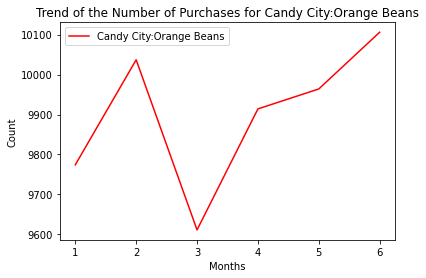

In [171]:

line2,=plt.plot(list_1,final_final_bar[1],color='r',label="Candy City:Orange Beans")
plt.xlabel('Months')
plt.ylabel('Count')
plt.title("Trend of the Number of Purchases for Candy City:Orange Beans")
second_legend=plt.legend(handles=[line2], loc=0)
plt.savefig('Orange Beans Count', dpi=600, bbox_inches='tight')




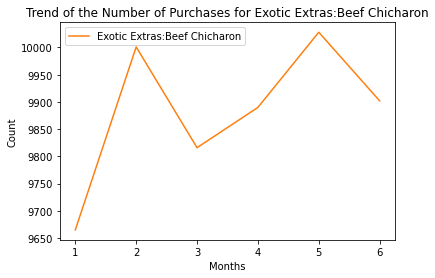

In [172]:
line3,=plt.plot(list_1,final_final_bar[2],color='tab:orange',label="Exotic Extras:Beef Chicharon")
plt.xlabel('Months')
plt.ylabel('Count')
plt.title("Trend of the Number of Purchases for Exotic Extras:Beef Chicharon")
second_legend=plt.legend(handles=[line3], loc=0)
plt.savefig('Chicharon Count', dpi=600, bbox_inches='tight')


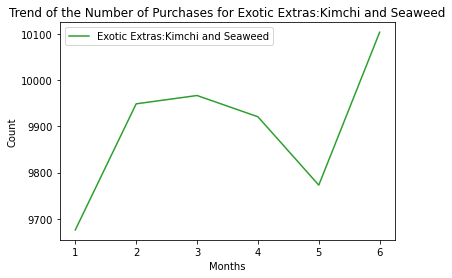

In [173]:
line4,=plt.plot(list_1,final_final_bar[3],color='tab:green',label="Exotic Extras:Kimchi and Seaweed")
plt.xlabel('Months')
plt.ylabel('Count')
plt.title("Trend of the Number of Purchases for Exotic Extras:Kimchi and Seaweed")
second_legend=plt.legend(handles=[line4], loc=0)
plt.savefig('Kimchi and Seaweed Count', dpi=600, bbox_inches='tight')


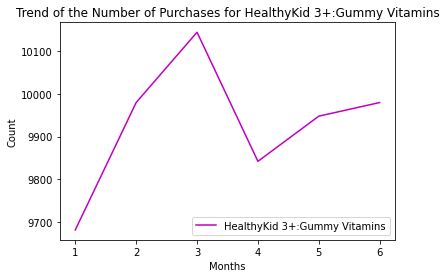

In [174]:
line5,=plt.plot(list_1,final_final_bar[4],color='m',label="HealthyKid 3+:Gummy Vitamins")
plt.xlabel('Months')
plt.ylabel('Count')
plt.title("Trend of the Number of Purchases for HealthyKid 3+:Gummy Vitamins")
second_legend=plt.legend(handles=[line5], loc=0)
plt.savefig('Gummy Vitamins Count', dpi=600, bbox_inches='tight')


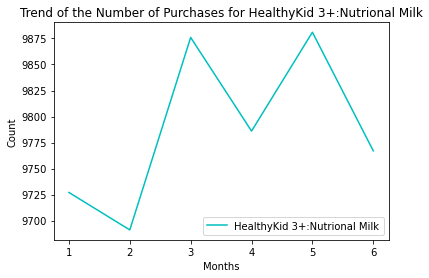

In [175]:
line6,=plt.plot(list_1,final_final_bar[5],color='c',label="HealthyKid 3+:Nutrional Milk")
plt.xlabel('Months')
plt.ylabel('Count')
plt.title("Trend of the Number of Purchases for HealthyKid 3+:Nutrional Milk")
second_legend=plt.legend(handles=[line6], loc=0)
plt.savefig('Milk Count', dpi=600, bbox_inches='tight')


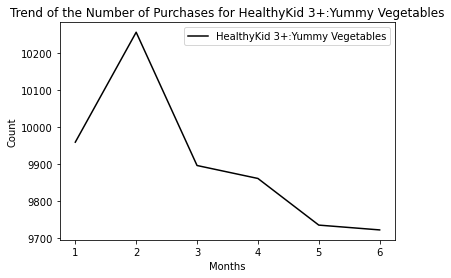

In [176]:
line7,=plt.plot(list_1,final_final_bar[6],color='k',label="HealthyKid 3+:Yummy Vegetables")
plt.xlabel('Months')
plt.ylabel('Count')
plt.title("Trend of the Number of Purchases for HealthyKid 3+:Yummy Vegetables")
second_legend=plt.legend(handles=[line7], loc=0)
plt.savefig('Yummy Vegetables Count', dpi=600, bbox_inches='tight')


In [ ]:
#create table for top-selling item per month 

In [84]:
final_bar_2

month,1,2,3,4,5,6
0,9559.0,9996.0,9986.0,10043.0,9801.0,9934.0
1,9774.0,10037.0,9611.0,9914.0,9964.0,10106.0
2,9665.0,10001.0,9816.0,9890.0,10028.0,9902.0
3,9676.0,9949.0,9967.0,9921.0,9773.0,10104.0
4,9681.0,9980.0,10145.0,9842.0,9948.0,9980.0
5,9727.0,9691.0,9876.0,9786.0,9881.0,9767.0
6,9959.0,10256.0,9896.0,9861.0,9735.0,9722.0


In [85]:
final_count_per_item_bar["Items"]

0              Candy City:Gummy Worms
1             Candy City:Orange Beans
2        Exotic Extras:Beef Chicharon
3    Exotic Extras:Kimchi and Seaweed
4        HealthyKid 3+:Gummy Vitamins
5        HealthyKid 3+:Nutrional Milk
6      HealthyKid 3+:Yummy Vegetables
Name: Items, dtype: object

In [86]:
final_bar_2_final = final_bar_2.assign(Items=final_count_per_item_bar["Items"])

In [87]:
final_bar_2_final

month,1,2,3,4,5,6,Items
0,9559.0,9996.0,9986.0,10043.0,9801.0,9934.0,Candy City:Gummy Worms
1,9774.0,10037.0,9611.0,9914.0,9964.0,10106.0,Candy City:Orange Beans
2,9665.0,10001.0,9816.0,9890.0,10028.0,9902.0,Exotic Extras:Beef Chicharon
3,9676.0,9949.0,9967.0,9921.0,9773.0,10104.0,Exotic Extras:Kimchi and Seaweed
4,9681.0,9980.0,10145.0,9842.0,9948.0,9980.0,HealthyKid 3+:Gummy Vitamins
5,9727.0,9691.0,9876.0,9786.0,9881.0,9767.0,HealthyKid 3+:Nutrional Milk
6,9959.0,10256.0,9896.0,9861.0,9735.0,9722.0,HealthyKid 3+:Yummy Vegetables


In [89]:
final_bar_2_final_max_per_month = final_bar_2_final.max()

In [90]:
final_bar_2_final_max_per_month

month
1                                9959.0
2                               10256.0
3                               10145.0
4                               10043.0
5                               10028.0
6                               10106.0
Items    HealthyKid 3+:Yummy Vegetables
dtype: object

In [91]:
final_bar_2_final[1].max()

9959.0

In [110]:
best_selling_item_m1=final_bar_2_final['Items'].where(final_bar_2_final[1] == final_bar_2_final[1].max()).dropna().values[0]

In [111]:
best_selling_item_m2=final_bar_2_final['Items'].where(final_bar_2_final[2] == final_bar_2_final[2].max()).dropna().values[0]

In [112]:
best_selling_item_m3=final_bar_2_final['Items'].where(final_bar_2_final[3] == final_bar_2_final[3].max()).dropna().values[0]

In [113]:
best_selling_item_m4=final_bar_2_final['Items'].where(final_bar_2_final[4] == final_bar_2_final[4].max()).dropna().values[0]

In [114]:
best_selling_item_m5=final_bar_2_final['Items'].where(final_bar_2_final[5] == final_bar_2_final[5].max()).dropna().values[0]

In [115]:
best_selling_item_m6=final_bar_2_final['Items'].where(final_bar_2_final[6] == final_bar_2_final[6].max()).dropna().values[0]

In [133]:
item_max_data= {'Month': ["1","2","3","4","5","6"],"Item": [best_selling_item_m1,best_selling_item_m2,best_selling_item_m3,best_selling_item_m4,best_selling_item_m5,best_selling_item_m6],"Count":[final_bar_2_final[1].max(),final_bar_2_final[2].max(),final_bar_2_final[3].max(),final_bar_2_final[4].max(),final_bar_2_final[5].max(),final_bar_2_final[6].max()]}

In [134]:
item_max_data

{'Month': ['1', '2', '3', '4', '5', '6'],
 'Item': ['HealthyKid 3+:Yummy Vegetables',
  'HealthyKid 3+:Yummy Vegetables',
  'HealthyKid 3+:Gummy Vitamins',
  'Candy City:Gummy Worms',
  'Exotic Extras:Beef Chicharon',
  'Candy City:Orange Beans'],
 'Count': [9959.0, 10256.0, 10145.0, 10043.0, 10028.0, 10106.0]}

In [135]:
best_selling_item_per_month = pd.DataFrame.from_dict(item_max_data, orient='index')

In [154]:
best_selling_item_per_month_1=best_selling_item_per_month.transpose()

In [155]:
best_selling_item_per_month_1

,Month,Item,Count
0,1,HealthyKid 3+:Yummy Vegetables,9959.0
1,2,HealthyKid 3+:Yummy Vegetables,10256.0
2,3,HealthyKid 3+:Gummy Vitamins,10145.0
3,4,Candy City:Gummy Worms,10043.0
4,5,Exotic Extras:Beef Chicharon,10028.0
5,6,Candy City:Orange Beans,10106.0


In [156]:
best_selling_item_per_month_1= best_selling_item_per_month_1.set_index('Month')

In [157]:
best_selling_item_per_month_1


,Item,Count
Month,,
1,HealthyKid 3+:Yummy Vegetables,9959.0
2,HealthyKid 3+:Yummy Vegetables,10256.0
3,HealthyKid 3+:Gummy Vitamins,10145.0
4,Candy City:Gummy Worms,10043.0
5,Exotic Extras:Beef Chicharon,10028.0
6,Candy City:Orange Beans,10106.0


In [ ]:
#create table for least-selling item per month 

In [178]:
least_selling_item_m1=final_bar_2_final['Items'].where(final_bar_2_final[1] == final_bar_2_final[1].min()).dropna().values[0]

In [179]:
least_selling_item_m2=final_bar_2_final['Items'].where(final_bar_2_final[2] == final_bar_2_final[2].min()).dropna().values[0]

In [180]:
least_selling_item_m3=final_bar_2_final['Items'].where(final_bar_2_final[3] == final_bar_2_final[3].min()).dropna().values[0]

In [181]:
least_selling_item_m4=final_bar_2_final['Items'].where(final_bar_2_final[4] == final_bar_2_final[4].min()).dropna().values[0]

In [182]:
least_selling_item_m5=final_bar_2_final['Items'].where(final_bar_2_final[5] == final_bar_2_final[5].min()).dropna().values[0]

In [183]:
least_selling_item_m6=final_bar_2_final['Items'].where(final_bar_2_final[6] == final_bar_2_final[6].min()).dropna().values[0]

In [184]:
item_min_data= {'Month': ["1","2","3","4","5","6"],"Item": [least_selling_item_m1,least_selling_item_m2,least_selling_item_m3,least_selling_item_m4,least_selling_item_m5,least_selling_item_m6],"Count":[final_bar_2_final[1].min(),final_bar_2_final[2].min(),final_bar_2_final[3].min(),final_bar_2_final[4].min(),final_bar_2_final[5].min(),final_bar_2_final[6].min()]}

In [185]:
least_selling_item_per_month = pd.DataFrame.from_dict(item_min_data, orient='index')

In [187]:
least_selling_item_per_month_1=least_selling_item_per_month.transpose()
least_selling_item_per_month_1= least_selling_item_per_month_1.set_index('Month')
least_selling_item_per_month_1

,Item,Count
Month,,
1,Candy City:Gummy Worms,9559.0
2,HealthyKid 3+:Nutrional Milk,9691.0
3,Candy City:Orange Beans,9611.0
4,HealthyKid 3+:Nutrional Milk,9786.0
5,HealthyKid 3+:Yummy Vegetables,9735.0
6,HealthyKid 3+:Yummy Vegetables,9722.0


In [ ]:
#create table for top selling month (month with most purchases) for a specific item 

In [137]:
final_bar_2

month,1,2,3,4,5,6
0,9559.0,9996.0,9986.0,10043.0,9801.0,9934.0
1,9774.0,10037.0,9611.0,9914.0,9964.0,10106.0
2,9665.0,10001.0,9816.0,9890.0,10028.0,9902.0
3,9676.0,9949.0,9967.0,9921.0,9773.0,10104.0
4,9681.0,9980.0,10145.0,9842.0,9948.0,9980.0
5,9727.0,9691.0,9876.0,9786.0,9881.0,9767.0
6,9959.0,10256.0,9896.0,9861.0,9735.0,9722.0


In [138]:
best_selling_month_per_item = final_bar_2.idxmax(axis = 1)

In [139]:
best_selling_month_per_item 

0    4
1    6
2    5
3    6
4    3
5    5
6    2
dtype: int64

In [143]:
best_selling_month_per_item_1 = pd.DataFrame(best_selling_month_per_item , columns=['Best-Selling Month'])

In [144]:
best_selling_month_per_item_1

,Best-Selling Month
0,4
1,6
2,5
3,6
4,3
5,5
6,2


In [140]:
final_bar_2.max(axis = 1)

0    10043.0
1    10106.0
2    10028.0
3    10104.0
4    10145.0
5     9881.0
6    10256.0
dtype: float64

In [145]:
best_selling_month_per_item_1= best_selling_month_per_item_1.assign(Count=final_bar_2.max(axis = 1))

In [148]:
best_selling_month_per_item_1=best_selling_month_per_item_1.assign(Items=final_count_per_item_bar["Items"])

In [149]:
best_selling_month_per_item_1

,Best-Selling Month,Count,Items
0,4,10043.0,Candy City:Gummy Worms
1,6,10106.0,Candy City:Orange Beans
2,5,10028.0,Exotic Extras:Beef Chicharon
3,6,10104.0,Exotic Extras:Kimchi and Seaweed
4,3,10145.0,HealthyKid 3+:Gummy Vitamins
5,5,9881.0,HealthyKid 3+:Nutrional Milk
6,2,10256.0,HealthyKid 3+:Yummy Vegetables


In [150]:
best_selling_month_per_item_1=best_selling_month_per_item_1[["Items","Best-Selling Month","Count"]]

In [151]:
best_selling_month_per_item_1

,Items,Best-Selling Month,Count
0,Candy City:Gummy Worms,4,10043.0
1,Candy City:Orange Beans,6,10106.0
2,Exotic Extras:Beef Chicharon,5,10028.0
3,Exotic Extras:Kimchi and Seaweed,6,10104.0
4,HealthyKid 3+:Gummy Vitamins,3,10145.0
5,HealthyKid 3+:Nutrional Milk,5,9881.0
6,HealthyKid 3+:Yummy Vegetables,2,10256.0


In [152]:
best_selling_month_per_item_1= best_selling_month_per_item_1.set_index('Items')

In [153]:
best_selling_month_per_item_1

,Best-Selling Month,Count
Items,,
Candy City:Gummy Worms,4,10043.0
Candy City:Orange Beans,6,10106.0
Exotic Extras:Beef Chicharon,5,10028.0
Exotic Extras:Kimchi and Seaweed,6,10104.0
HealthyKid 3+:Gummy Vitamins,3,10145.0
HealthyKid 3+:Nutrional Milk,5,9881.0
HealthyKid 3+:Yummy Vegetables,2,10256.0


In [ ]:
#create table for least selling month (month with least purchases) for a specific item 

In [189]:
final_bar_2

month,1,2,3,4,5,6
0,9559.0,9996.0,9986.0,10043.0,9801.0,9934.0
1,9774.0,10037.0,9611.0,9914.0,9964.0,10106.0
2,9665.0,10001.0,9816.0,9890.0,10028.0,9902.0
3,9676.0,9949.0,9967.0,9921.0,9773.0,10104.0
4,9681.0,9980.0,10145.0,9842.0,9948.0,9980.0
5,9727.0,9691.0,9876.0,9786.0,9881.0,9767.0
6,9959.0,10256.0,9896.0,9861.0,9735.0,9722.0


In [190]:
least_selling_month_per_item = final_bar_2.idxmin(axis = 1)

In [191]:
least_selling_month_per_item 

0    1
1    3
2    1
3    1
4    1
5    2
6    6
dtype: int64

In [194]:
least_selling_month_per_item_1 = pd.DataFrame(least_selling_month_per_item , columns=['Least-Selling Month'])

In [195]:
final_bar_2.min(axis = 1)

0    9559.0
1    9611.0
2    9665.0
3    9676.0
4    9681.0
5    9691.0
6    9722.0
dtype: float64

In [196]:
least_selling_month_per_item_1= least_selling_month_per_item_1.assign(Count=final_bar_2.min(axis = 1))

In [198]:
least_selling_month_per_item_1=least_selling_month_per_item_1.assign(Items=final_count_per_item_bar["Items"])

In [199]:
least_selling_month_per_item_1

,Least-Selling Month,Count,Items
0,1,9559.0,Candy City:Gummy Worms
1,3,9611.0,Candy City:Orange Beans
2,1,9665.0,Exotic Extras:Beef Chicharon
3,1,9676.0,Exotic Extras:Kimchi and Seaweed
4,1,9681.0,HealthyKid 3+:Gummy Vitamins
5,2,9691.0,HealthyKid 3+:Nutrional Milk
6,6,9722.0,HealthyKid 3+:Yummy Vegetables


In [200]:
least_selling_month_per_item_1=least_selling_month_per_item_1[["Items","Least-Selling Month","Count"]]

In [201]:
least_selling_month_per_item_1= least_selling_month_per_item_1.set_index('Items')

In [202]:
least_selling_month_per_item_1

,Least-Selling Month,Count
Items,,
Candy City:Gummy Worms,1,9559.0
Candy City:Orange Beans,3,9611.0
Exotic Extras:Beef Chicharon,1,9665.0
Exotic Extras:Kimchi and Seaweed,1,9676.0
HealthyKid 3+:Gummy Vitamins,1,9681.0
HealthyKid 3+:Nutrional Milk,2,9691.0
HealthyKid 3+:Yummy Vegetables,6,9722.0


In [159]:
pip install dataframe_image

Note: you may need to restart the kernel to use updated packages.


In [160]:
import dataframe_image as dfi

In [161]:
final_count_per_item

Count                                      \
month                                  1        2        3        4        5   
Items                                                                          
Candy City:Gummy Worms            9559.0   9996.0   9986.0  10043.0   9801.0   
Candy City:Orange Beans           9774.0  10037.0   9611.0   9914.0   9964.0   
Exotic Extras:Beef Chicharon      9665.0  10001.0   9816.0   9890.0  10028.0   
Exotic Extras:Kimchi and Seaweed  9676.0   9949.0   9967.0   9921.0   9773.0   
HealthyKid 3+:Gummy Vitamins      9681.0   9980.0  10145.0   9842.0   9948.0   
HealthyKid 3+:Nutrional Milk      9727.0   9691.0   9876.0   9786.0   9881.0   
HealthyKid 3+:Yummy Vegetables    9959.0  10256.0   9896.0   9861.0   9735.0   

                                           
month                                   6  
Items                                      
Candy City:Gummy Worms             9934.0  
Candy City:Orange Beans           10106.0  
Exotic Extras:Beef Chicharon       9902.0  
Exotic Extras:Kimchi and Seaweed  10104.0  
HealthyKid 3+:Gummy Vitamins       9980.0  
HealthyKid 3+:Nutrional Milk       9767.0  
HealthyKid 3+:Yummy Vegetables     9722.0

In [162]:
dfi.export(final_count_per_item,"final_count_per_item")

[0724/130959.012394:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmptl0ek6cc/temp.png.


In [163]:
best_selling_item_per_month_1

,Item,Count
Month,,
1,HealthyKid 3+:Yummy Vegetables,9959.0
2,HealthyKid 3+:Yummy Vegetables,10256.0
3,HealthyKid 3+:Gummy Vitamins,10145.0
4,Candy City:Gummy Worms,10043.0
5,Exotic Extras:Beef Chicharon,10028.0
6,Candy City:Orange Beans,10106.0


In [164]:
dfi.export(best_selling_item_per_month_1,"best_selling_item_per_month_1")

[0724/131122.105500:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmpchvi29w8/temp.png.


In [166]:
best_selling_month_per_item_1

,Best-Selling Month,Count
Items,,
Candy City:Gummy Worms,4,10043.0
Candy City:Orange Beans,6,10106.0
Exotic Extras:Beef Chicharon,5,10028.0
Exotic Extras:Kimchi and Seaweed,6,10104.0
HealthyKid 3+:Gummy Vitamins,3,10145.0
HealthyKid 3+:Nutrional Milk,5,9881.0
HealthyKid 3+:Yummy Vegetables,2,10256.0


In [167]:
dfi.export(best_selling_month_per_item_1,"best_selling_month_per_item_1")

[0724/131205.422349:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmpweznwi6t/temp.png.


In [188]:
dfi.export(least_selling_item_per_month_1,"least_selling_item_per_month_1")

[0724/141645.624673:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmpbcerut4y/temp.png.


In [203]:
dfi.export(least_selling_month_per_item_1,"least_selling_month_per_item_1")

[0724/142327.384999:INFO:headless_shell.cc(660)] Written to file /var/folders/n1/vl98150x7gz4l5g4l74pjhqh0000gn/T/tmpp1o1gvnw/temp.png.
